## Problem Statement

The client stated that scale was a big problem of theirs and they are struggling to manage the scale with the resources that they currently have. The brief said that the client is looking for help with the management of their journey into such a large scale.

## Goal

The brief carefully states that the client wanted to see “An analysis of their content categories showing the top 5 categories with the largest popularity. They are Audit of big data practice, recommendations for IPO, analysis of popular content.

## Import and clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
content = pd.read_csv('Content.csv')
print(f' the data has {content.shape[0]} rows and {content.shape[1]} columns')

 the data has 1000 rows and 5 columns


In [3]:
content.head()

,Unnamed: 0,Content ID,User ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [4]:
content = content.drop('Unnamed: 0', axis = 1)

In [5]:
reactions = pd.read_csv('Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25


In [6]:
reactions = reactions.drop('Unnamed: 0', axis = 1)

In [7]:
print(f' the data has {reactions.shape[0]} rows and {reactions.shape[1]} columns')

 the data has 24573 rows and 3 columns


In [8]:
reaction_type = pd.read_csv('ReactionTypes.csv')
reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [9]:
reaction_type.shape

(16, 4)

In [10]:
reaction_type = reaction_type.rename(columns ={'Type': 'Reaction Type'})
reaction_type

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [11]:
reaction_type = reaction_type.drop('Unnamed: 0', axis = 1)
reaction_type.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


## Data Concatination with merge function

In [12]:
df = pd.merge(reactions, content, on ='Content ID')

In [13]:
df.head()

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying


In [14]:
df.shape

(24573, 6)

In [15]:
df = df.drop('User ID', axis = 1)
df

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,6/27/2020 9:46,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2/16/2021 17:17,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,9/12/2020 3:54,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,11/4/2020 20:08,audio,technology


In [16]:
data = pd.merge(df, reaction_type, on ='Reaction Type')
data.head(7)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,4/9/2021 2:46,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,3/28/2021 21:15,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,8/4/2020 5:40,photo,healthy eating,negative,0
5,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,1/14/2021 7:21,video,dogs,negative,0
6,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,1/13/2021 23:35,video,dogs,negative,0


In [17]:
data = data.drop('Content ID', axis = 1)
data.head()

,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,disgust,11/7/2020 9:43,photo,Studying,negative,0
1,disgust,1/6/2021 19:13,photo,Studying,negative,0
2,disgust,4/9/2021 2:46,photo,Studying,negative,0
3,disgust,3/28/2021 21:15,photo,healthy eating,negative,0
4,disgust,8/4/2020 5:40,photo,healthy eating,negative,0


In [18]:
data.isnull().sum()

Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

In [19]:
data['Category'].value_counts()

animals            1805
healthy eating     1711
technology         1695
science            1680
cooking            1664
culture            1635
travel             1618
food               1608
education          1397
soccer             1392
dogs               1338
tennis             1328
studying           1318
fitness            1257
veganism           1237
public speaking    1185
Fitness             138
Science             116
Animals              92
Food                 91
Soccer               65
Studying             45
Culture              41
Education            36
Public Speaking      32
Travel               29
Veganism             11
Healthy Eating        6
Technology            3
Name: Category, dtype: int64

## Removing duplicates with ignoring case sensitive and adding the next column values with the first one in pandas dataframe in python

In [20]:
data = (data.groupby(data['Category'].str.lower(), as_index=False, sort=False)
        .agg({'Category':'first', 'Score':'sum'}))



In [21]:
data.groupby('Category').sum()['Score']

Category
Studying           54269
animals            74965
cooking            64756
culture            66579
dogs               52511
education          57436
fitness            55323
food               66676
healthy eating     69339
public speaking    49264
science            71168
soccer             57783
technology         68738
tennis             50339
travel             64880
veganism           49619
Name: Score, dtype: int64

In [22]:
category_score = data.groupby('Category').sum()['Score']

In [23]:
category_score = category_score.sort_values(ascending = False)
category_score

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
Studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64

## Visualization

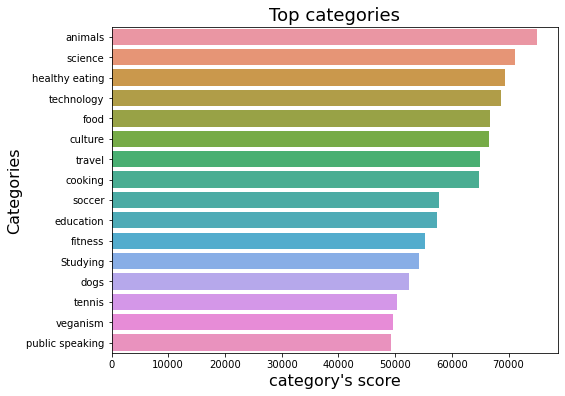

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=category_score, y=category_score.index)
ax.set_title("Top categories", size = 18)
ax.set_yticklabels(category_score.index)
ax.set_xlabel("category's score", size = 16)
ax.set_ylabel("Categories", size = 16)
plt.show()

In [25]:
top_five =category_score.head()
top_five

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

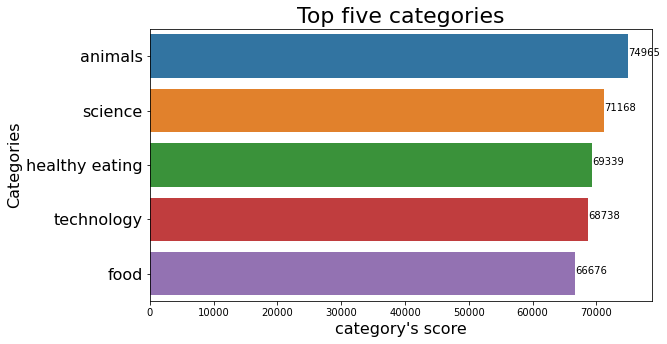

In [35]:
f, ax = plt.subplots(figsize=(9, 5))
ax = sns.barplot(x=top_five, y=top_five.index)
ax.set_title("Top five categories", size = 22)
ax.set_yticklabels(top_five.index, size = 16)
ax.set_xlabel("category's score", size = 16)
ax.set_ylabel("Categories", size = 16)

for index, value in enumerate(top_five):
    
    plt.text(value, index, str(value))
    
plt.show()
    


## Pie Chart

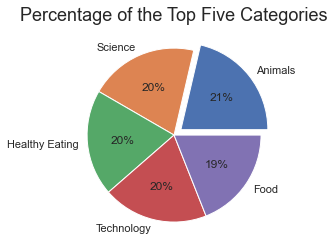

In [39]:
value = [74965, 71168, 69339, 68738, 66676]
names = ['Animals', 'Science', 'Healthy Eating', 'Technology', 'Food']
plt.pie(value, labels = names, explode =(0.1,0,0,0,0), autopct = '%1.000f%%')
plt.title('Percentage of the Top Five Categories', size = 18)
plt.show()
sns.set()

## Conclusion

the top 5 categories with the largest popularity are Animals (74965), Science(71168), Healthy Eating(69339),Technology(68738), Food(66676), respectively.